## Diff GridFits

Originally written by Alex Broughton



In [1]:
! eups list -s | grep lsst_distrib

lsst_distrib          g4213664e8e+995cec829e 	w_2023_29 setup


In [2]:
import os
import numpy as np
import glob
from astropy.io import fits
import pickle as pkl
import matplotlib.pyplot as plt
from lsst.daf.butler import Butler
import lsst.afw.display as afwDisplay
import lsst.afw.image as afwImage
from lsst.obs.lsst import LsstCam
from lsst.afw.cameraGeom.utils import findAmp
from lsst.geom import Point2I
from astropy.table import Table, vstack, join
from scipy import stats
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from scipy.ndimage import gaussian_filter
import logging

import sys
sys.path.append('/sdf/home/a/abrought/bin')
from SpotAnalysis import *

logging.basicConfig()
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

repo_path = "/repo/main"

butler = Butler(repo_path)
registry = butler.registry

def display(exposure,title=None):
    afwDisplay.setDefaultBackend('matplotlib') 
    fig = plt.figure(figsize=(9,9))
    afw_display = afwDisplay.Display(1)
    afw_display.scale('asinh', 'zscale')
    afw_display.mtv(exposure.getImage())
    plt.title(title)
    plt.gca().axis('off')

#### Read Data

In [3]:
refnum = 23

(0.0, 4000.0)

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

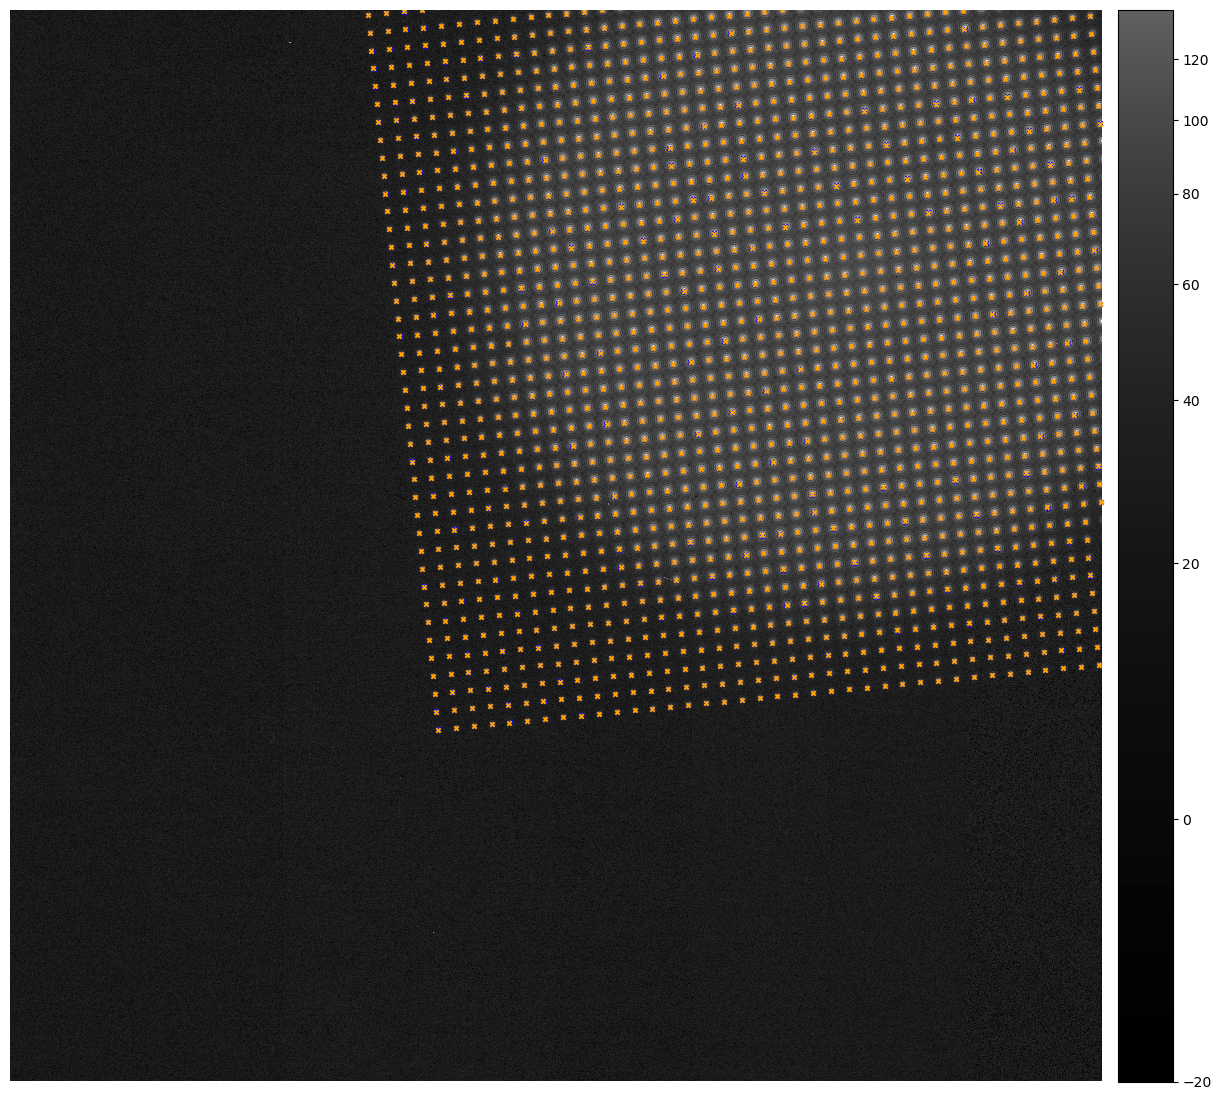

In [4]:
col = ["u/abrought/BF/2023.07.19/run_13248/R03-S12/uncorrected"]
subbutler = Butler("/repo/main", collections=col)
subregistry = subbutler.registry

datasetRefs = list(subregistry.queryDatasets(datasetType="gridSpotSrc", collections=col))
#print(len(datasetRefs))


#for ind, ref in enumerate(datasetRefs):
#    #ref = datasetRefs[ind]
#    print(ind)
#    raw = subbutler.get("raw",dataId=ref.dataId)
#    md = raw.getMetadata()
#    exptime = md["EXPTIME"]
#    if exptime == 15.:
#        aref = ref
#        break


aref = datasetRefs[23]
raw = subbutler.get("raw",dataId=aref.dataId)
md = raw.getMetadata()
exptime = md["EXPTIME"]

fig, axs = plt.subplots(2,2, figsize=(15,15))
# Get the postISR image
postisr = subbutler.get("postISRCCD",dataId=aref.dataId)
gridfit = subbutler.get("gridSpotSrc",dataId=aref.dataId)

plt.figure(figsize=(9,9))
display(postisr)
plt.scatter(gridfit['base_SdssCentroid_x'], gridfit['base_SdssCentroid_y'], s= 10, marker="x", color="b")
plt.scatter(gridfit['spotgrid_x'], gridfit['spotgrid_y'], s= 10, marker="x", color="orange")

plt.xlim(0,4096)
plt.ylim(0,4000)

In [ ]:
col = ["u/abrought/BF/2023.05.15/run_13248/R03-S12/uncorrected"]
subbutler = Butler("/repo/main", collections=col)
subregistry = subbutler.registry

datasetRefs = list(subregistry.queryDatasets(datasetType="gridSpotSrc", collections=col))
#print(len(datasetRefs))


#for ind, ref in enumerate(datasetRefs):
#    #ref = datasetRefs[ind]
#    print(ind)
#    raw = subbutler.get("raw",dataId=ref.dataId)
#    md = raw.getMetadata()
#    exptime = md["EXPTIME"]
#    if exptime == 15.:
#        aref = ref
#        break


aref = datasetRefs[23]
raw2 = subbutler.get("raw",dataId=aref.dataId)
md = raw.getMetadata()
exptime = md["EXPTIME"]

fig, axs = plt.subplots(2,2, figsize=(15,15))
# Get the postISR image
postisr2 = subbutler.get("postISRCCD",dataId=aref.dataId)
gridfit2 = subbutler.get("gridSpotSrc",dataId=aref.dataId)

plt.figure(figsize=(9,9))
display(postisr2)
plt.scatter(gridfit2['base_SdssCentroid_x'], gridfit2['base_SdssCentroid_y'], s= 10, marker="x", color="b")
plt.scatter(gridfit2['spotgrid_x'], gridfit2['spotgrid_y'], s= 10, marker="x", color="orange")

plt.xlim(0,4096)
plt.ylim(0,4000)